Load and Inspect Dataset

In [21]:
import pandas as pd

# Load the dataset
file_path = 'Cleaned_Blood_Glucose_Data.xlsx'
data = pd.read_excel(file_path)

# Display dataset overview
print("Dataset Overview:")
print(data.head())
print("\nDataset Information:")
data.info()

# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

Dataset Overview:
   Age  Blood Glucose Level(BGL)  Diastolic Blood Pressure  \
0    9                        79                        73   
1    9                        80                        73   
2    9                        70                        76   
3    9                        70                        78   
4   66                       100                        96   

   Systolic Blood Pressure  Heart Rate  Body Temperature  SPO2  \
0                      118          98         98.300707    99   
1                      119         102         98.300707    94   
2                      110          81         98.300707    98   
3                      115          96         98.300707    96   
4                      144          92         97.807052    98   

   Sweating  (Y/N)  Shivering (Y/N) Diabetic/NonDiabetic (D/N)  
0                0                0                          N  
1                1                0                          N  
2                

Data Cleaning

In [22]:
# Rename columns for clarity
data.rename(columns={'Blood Glucose Level(BGL)': 'Glucose_Level',
                     'Diabetic/NonDiabetic (D/N)': 'Diabetic_Status'}, inplace=True)

# Handle missing values with median imputation
for col in data.select_dtypes(include='number').columns:
    data[col].fillna(data[col].median(), inplace=True)

# Drop duplicates
data.drop_duplicates(inplace=True)

print("\nCleaned Dataset:")
print(data.head())


Cleaned Dataset:
   Age  Glucose_Level  Diastolic Blood Pressure  Systolic Blood Pressure  \
0    9             79                        73                      118   
1    9             80                        73                      119   
2    9             70                        76                      110   
3    9             70                        78                      115   
4   66            100                        96                      144   

   Heart Rate  Body Temperature  SPO2  Sweating  (Y/N)  Shivering (Y/N)  \
0          98         98.300707    99                0                0   
1         102         98.300707    94                1                0   
2          81         98.300707    98                1                0   
3          96         98.300707    96                1                0   
4          92         97.807052    98                0                0   

  Diabetic_Status  
0               N  
1               N  
2             

<ipython-input-22-768cb2f3f46e>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


Outlier Detection and Removal

In [23]:
from scipy.stats import zscore
import numpy as np

# Remove outliers based on Z-scores
z_scores = np.abs(zscore(data.select_dtypes(include='number')))
outlier_threshold = 3
data_no_outliers = data[(z_scores < outlier_threshold).all(axis=1)]

print(f"Outliers Removed: {len(data) - len(data_no_outliers)}")
data = data_no_outliers

Outliers Removed: 1122


New Feature Engineering

In [24]:
# Add new derived features
data['Glucose_to_BloodPressure'] = data['Glucose_Level'] / data['Systolic Blood Pressure']
data['HeartRate_to_Age'] = data['Heart Rate'] / data['Age']
data['BloodPressure_Difference'] = data['Systolic Blood Pressure'] - data['Diastolic Blood Pressure']

# Encode age group
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 18, 45, 60, 100], labels=['Child', 'Young Adult', 'Middle Age', 'Senior'])

print("\nDerived Features:")
print(data[['Glucose_to_BloodPressure', 'HeartRate_to_Age', 'BloodPressure_Difference', 'Age_Group']].head())


Derived Features:
   Glucose_to_BloodPressure  HeartRate_to_Age  BloodPressure_Difference  \
0                  0.669492         10.888889                        45   
2                  0.636364          9.000000                        34   
3                  0.608696         10.666667                        37   
5                  0.751880          1.348485                        61   
7                  0.714286          1.257576                        63   

  Age_Group  
0     Child  
2     Child  
3     Child  
5    Senior  
7    Senior  


Data Exploration - Distribution Plots

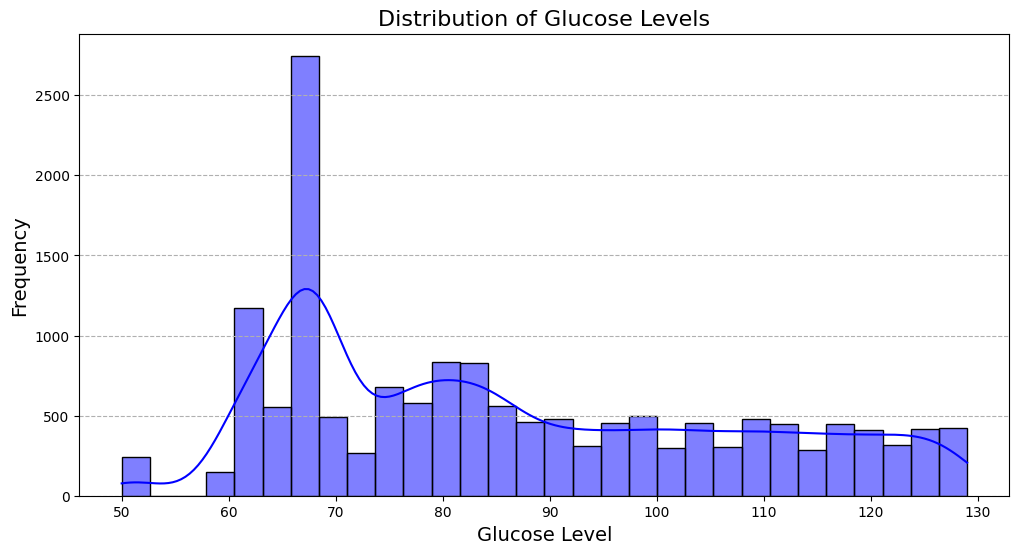

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Glucose Levels
plt.figure(figsize=(12, 6))
sns.histplot(data['Glucose_Level'], kde=True, color='blue', bins=30)
plt.title('Distribution of Glucose Levels', fontsize=16)
plt.xlabel('Glucose Level', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--')
plt.show()

Correlation Heatmap